In [11]:
import pandas as pd

In [22]:
df = pd.read_csv('Yemen.csv')
df = df.drop_duplicates()

# Removed unused columns
df.drop(["Pop", "PopNmbr", "DmgrphCode", "SvyDate"], axis = 1, inplace = True) 

# Rename columns
df.rename(columns = {"Date": "Datetime", "Dmgrph": "AdminStrata", "Mean_crrnt": "FCS"}, inplace = True)

# Convert date string to datetime object
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) 
print(sorted(df["AdminStrata"].unique()))



['Abyan', 'Aden', 'Al Bayda', "Al Dhale'e", 'Al Hudaydah', 'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran', 'Dhamar', 'Hadramaut', 'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah', "Sa'ada", "Sana'a", 'Shabwah', 'Socotra', 'Taizz']


In [13]:
# Group dataframe by administrative regions and resample to daily
df = df.groupby(["AdminStrata"]).apply(lambda x: x.set_index("Datetime").resample("D").mean()).reset_index()

# Set index to Datetime
df = df.set_index(['Datetime', 'AdminStrata']).unstack("AdminStrata").reorder_levels([1,0], axis=1).sort_index(axis=1, level=[0,1])
df.columns.rename("Index", level=1, inplace=True)

In [14]:
df.head()

AdminStrata,Abyan,Aden,Al Bayda,Al Dhale'e,Al Hudaydah,Al Jawf,Al Maharah,Al Mahwit,Amanat Al Asimah,Amran,...,Hajjah,Ibb,Lahj,Marib,Raymah,Sa'ada,Sana'a,Shabwah,Socotra,Taizz
Index,FCS,FCS,FCS,FCS,FCS,FCS,FCS,FCS,FCS,FCS,...,FCS,FCS,FCS,FCS,FCS,FCS,FCS,FCS,FCS,FCS
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-07-02,31.158690,16.619519,38.332669,29.194825,20.788151,22.085706,2.892308,16.815145,17.000398,20.446735,...,28.361345,25.036668,31.762436,32.596233,54.121774,17.676022,26.917713,16.752289,23.822825,26.563365
2018-07-03,32.675222,16.370603,43.292084,31.336940,20.692544,23.477196,2.913825,19.833443,17.208166,21.689014,...,28.805448,27.102390,32.049499,33.333333,56.722689,17.134560,25.783476,18.257453,23.699881,29.124005
2018-07-04,33.415597,15.089163,45.128205,33.135157,21.825051,24.864000,2.950408,19.614289,18.070801,25.611124,...,30.993706,29.844066,33.106267,36.883683,56.306306,17.454545,25.436047,19.083081,23.103187,29.427973
2018-07-05,33.531451,15.766521,43.959297,34.554309,21.481693,27.814992,2.247913,19.558566,19.021964,27.922484,...,32.905902,29.025363,32.938828,36.897633,56.231003,17.846350,27.421759,20.349533,21.596419,30.456026
2018-07-06,33.951856,16.870065,44.516521,33.878557,21.076712,28.688245,2.269780,17.608130,19.817567,28.712235,...,32.598181,30.692766,33.837934,36.669568,57.324841,18.463057,26.547231,21.107524,20.129084,31.012517


In [15]:
# check for null values
df.isnull().sum().sum()

88

In [16]:
# interpolate missing values using cubic spline
df_interpolate = df.groupby(axis=1, level=["AdminStrata"], group_keys=False).apply(lambda x: x.interpolate(method="cubic"))
df_interpolate.isnull().sum().sum()

C:\Users\malco\AppData\Local\Temp\ipykernel_9188\3049970325.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_interpolate = df.groupby(axis=1, level=["AdminStrata"], group_keys=False).apply(lambda x: x.interpolate(method="cubic"))


0

<Axes: title={'center': 'Yemen'}, xlabel='Date', ylabel='FCS'>

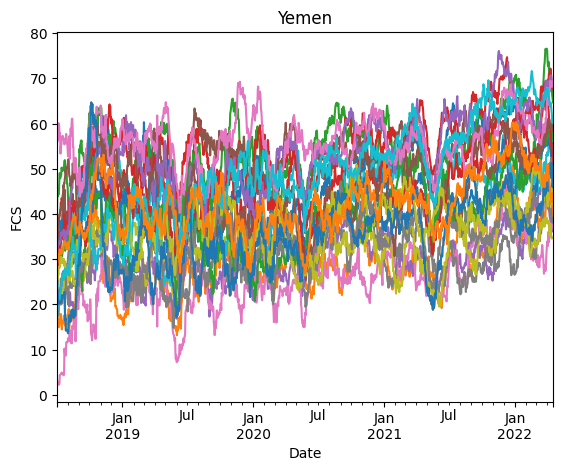

In [17]:
df_interpolate.plot(title="Yemen", legend=False, xlabel="Date", ylabel="FCS")

In [19]:
df_interpolate.to_csv("../Time Series/FCS.csv", index_label=False)